# <u>HOUSE PRICE PREDICTIONS FOR HOUSES IN THE U.S.A</u>

## <i> Predicting the prices of the house using Regression Techniques by knowing the following parameters:</i>

### 1. ***Income***
### 2. ***House Age*** 
### 3. ***No. of Rooms***
### 4. ***No. of Bathrooms***
### 5. ***Area Population***


#### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

plt.rcParams['figure.figsize']=15,6

import warnings
warnings.filterwarnings('ignore')

### READING THE CSV FILE

In [2]:
df=pd.read_csv("E:\\PDMLB\\PDSMLB\\10. Linear-Regression\\USA_Housing.csv")

### EXPLORATORY DATA ANALYSIS

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 254.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


In [7]:
df=df.drop('Address',1)

In [8]:
df['Avg. Area House Age']=df['Avg. Area House Age'].round(1)
df['Avg. Area Income']=df['Avg. Area Income'].round(0)
df['Avg. Area Number of Bedrooms']=df['Avg. Area Number of Bedrooms'].round(0)
df['Avg. Area Number of Rooms']=df['Avg. Area Number of Rooms'].round(0)
df['Area Population']=df['Area Population'].round(0)
df['Price']=df['Price'].round(0)


In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

### DATA VISUALISATION

##### HISTOGRAM FOR INCOME,HOUSE AGE AND ROOMS

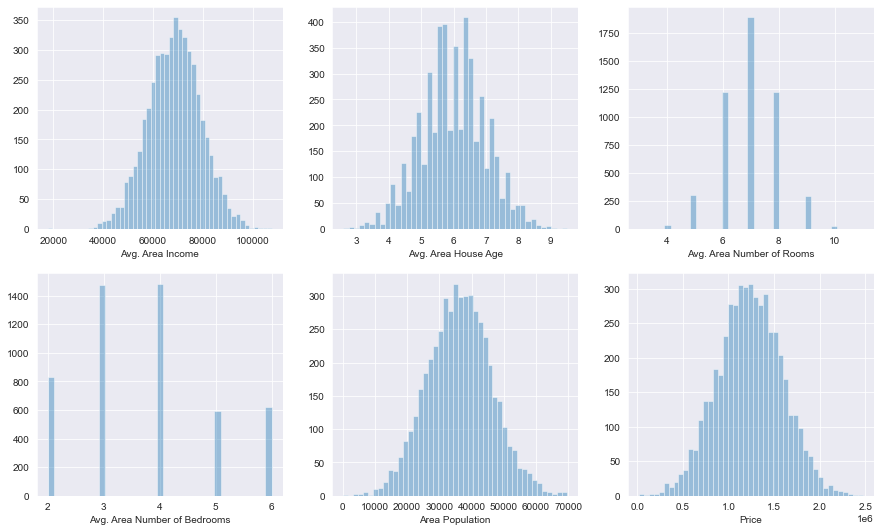

In [10]:
plt.figure(figsize=(15,9))
sb.set_style('darkgrid')
for col,name in zip(range(len(df.columns)),df.columns): 
    plt.subplot(2,3,col+1)
    sb.distplot(df[name],kde=False)

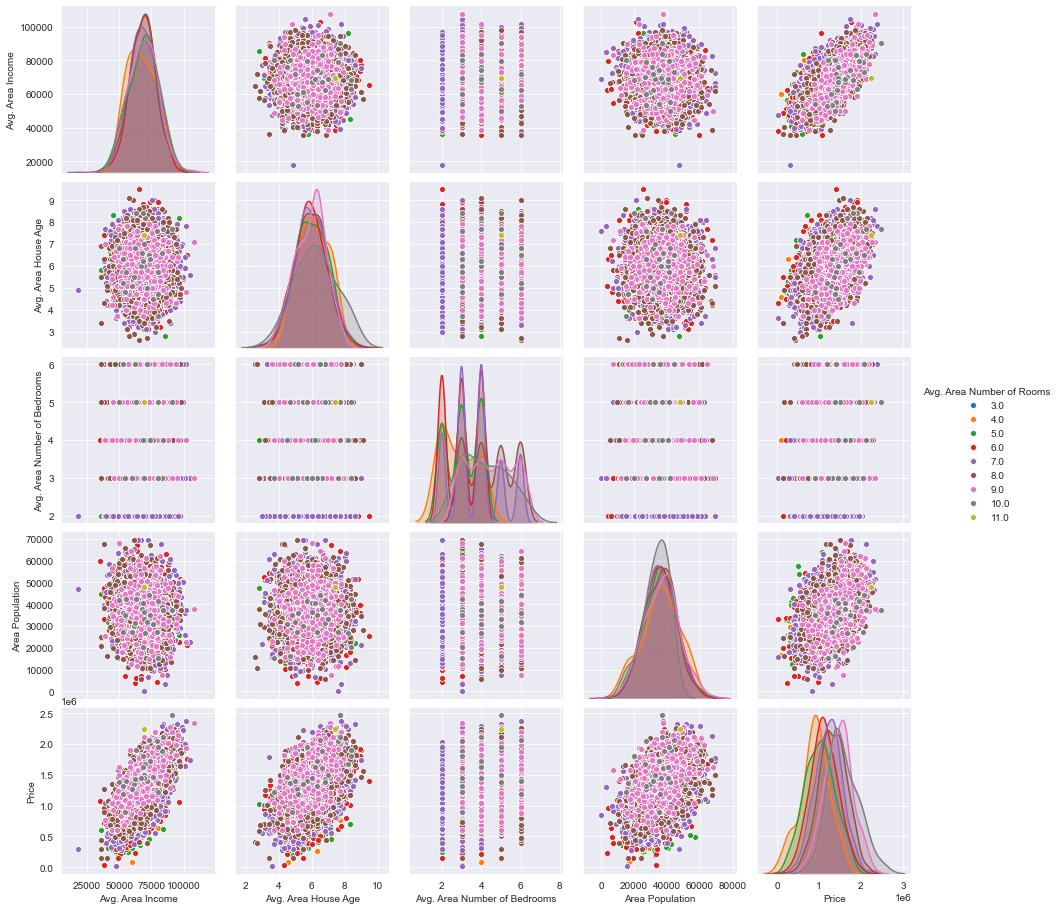

In [11]:
sb.pairplot(df,hue='Avg. Area Number of Rooms')

#### CLASSIFYING COLUMNS AS DISCRETE OR CONTINUOUS

In [12]:
discrete=['Avg. Area Number of Rooms','Avg. Area Number of Bedrooms']
continuous=['Avg. Area Income', 'Avg. Area House Age', 'Area Population', 'Price']

#### BOXPLOTS

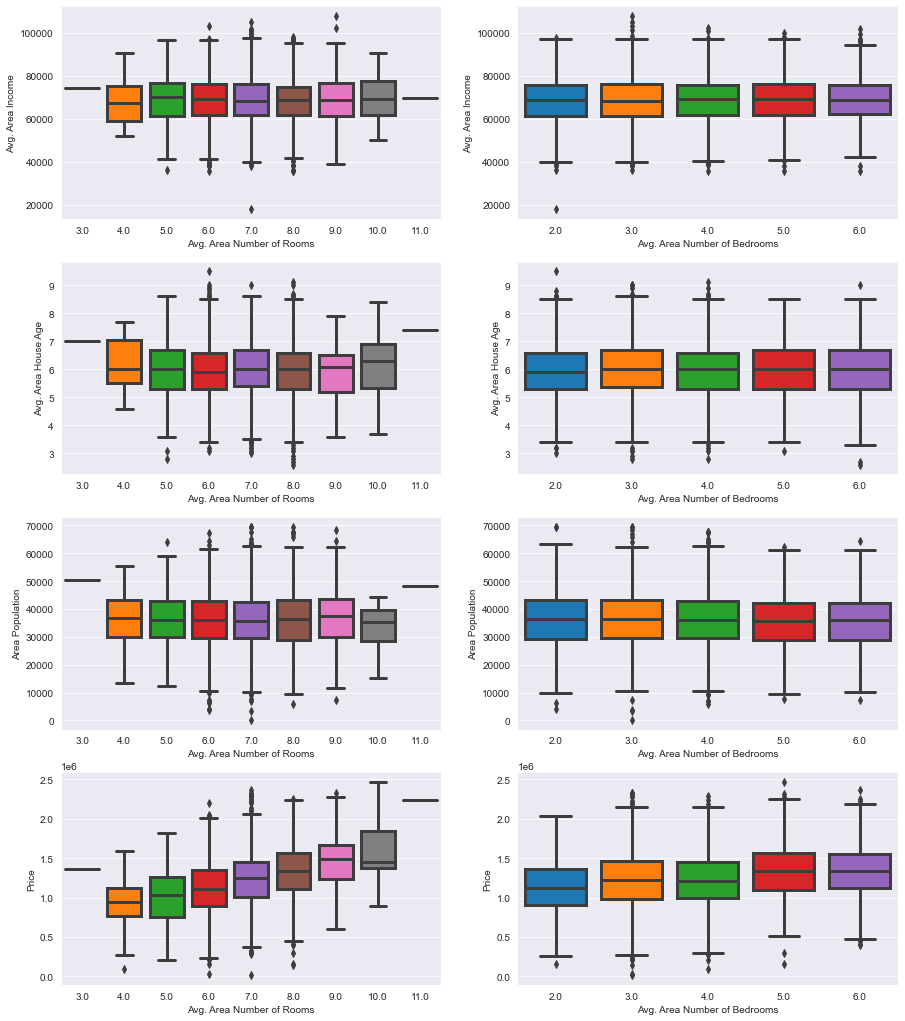

In [13]:
f,ax=plt.subplots(len(continuous),len(discrete),figsize=(15,18))
for c,n1 in zip(continuous,range(len(continuous))):
    for d,n2 in zip(discrete,range(len(discrete))):
        sb.boxplot(x=df[d],y=df[c],saturation=5,linewidth=3,ax=ax[n1][n2])

#### COUNTPLOT

<AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='count'>

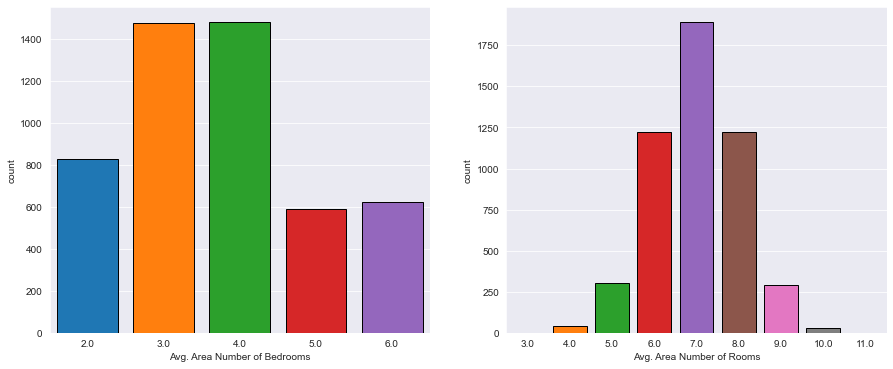

In [14]:
plt.subplot(1,2,1)
sb.countplot(df['Avg. Area Number of Bedrooms'],edgecolor='k',saturation=5)

plt.subplot(1,2,2)
sb.countplot(df['Avg. Area Number of Rooms'],edgecolor='k',saturation=5)

#### TRAIN-TEST SPLIT

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,max_error

In [16]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=df['Price']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### IMPORTING THE REGRESSOR LIBRARIES

In [18]:
from sklearn.linear_model import LinearRegression,ARDRegression,Lasso,ElasticNet,RANSACRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor,ExtraTreesRegressor


In [19]:
lr=LinearRegression()
rfr=RandomForestRegressor()
ard=ARDRegression()
lasso=Lasso()
en=ElasticNet()
abr=AdaBoostRegressor()
br=BaggingRegressor()
gbr=GradientBoostingRegressor()
ransac=RANSACRegressor()
etc=ExtraTreesRegressor()


#---------CREATING A LIST OF MODELS AND NAMES---------------------------#

models=[lr,rfr,etc,ard,lasso,en,abr,br,gbr,ransac] 
names=[x.__class__.__name__ for x in models]

### TRAINING THE MODEL AND PREDICTING THE PRICES

In [20]:
predictions=[]
for m in models:
    m.fit(X_train,y_train)
    predictions.append(m.predict(X_test))

#### CREATING A DATAFRAME FOR PREDICTIONS OF DIFFERENT MODELS

In [21]:
y_pred=pd.DataFrame({i:j for i,j in zip(names,predictions)})

#### CREATING A DATAFRAME FOR SCORES

In [22]:
R2_Scores=pd.Series({var:r2_score(y_test,y_pred[var]) for var in y_pred.columns})
MAE_Scores=pd.Series({var:mean_absolute_error(y_test,y_pred[var]) for var in y_pred.columns})
MSE_scores=pd.Series({var:mean_squared_error(y_test,y_pred[var]) for var in y_pred.columns})
RMSE_Scores=pd.Series({var:mean_squared_error(y_test,y_pred[var])**0.5 for var in y_pred.columns})

Scores=pd.DataFrame([R2_Scores,MAE_Scores,MSE_scores,RMSE_Scores],index=['R2','MAE','MSE','RMSE'])
Scores=Scores.transpose()

#### PLOTTING A GRAPH BETWEEN THE TRUE VALUE AND PREDICTED VALUES

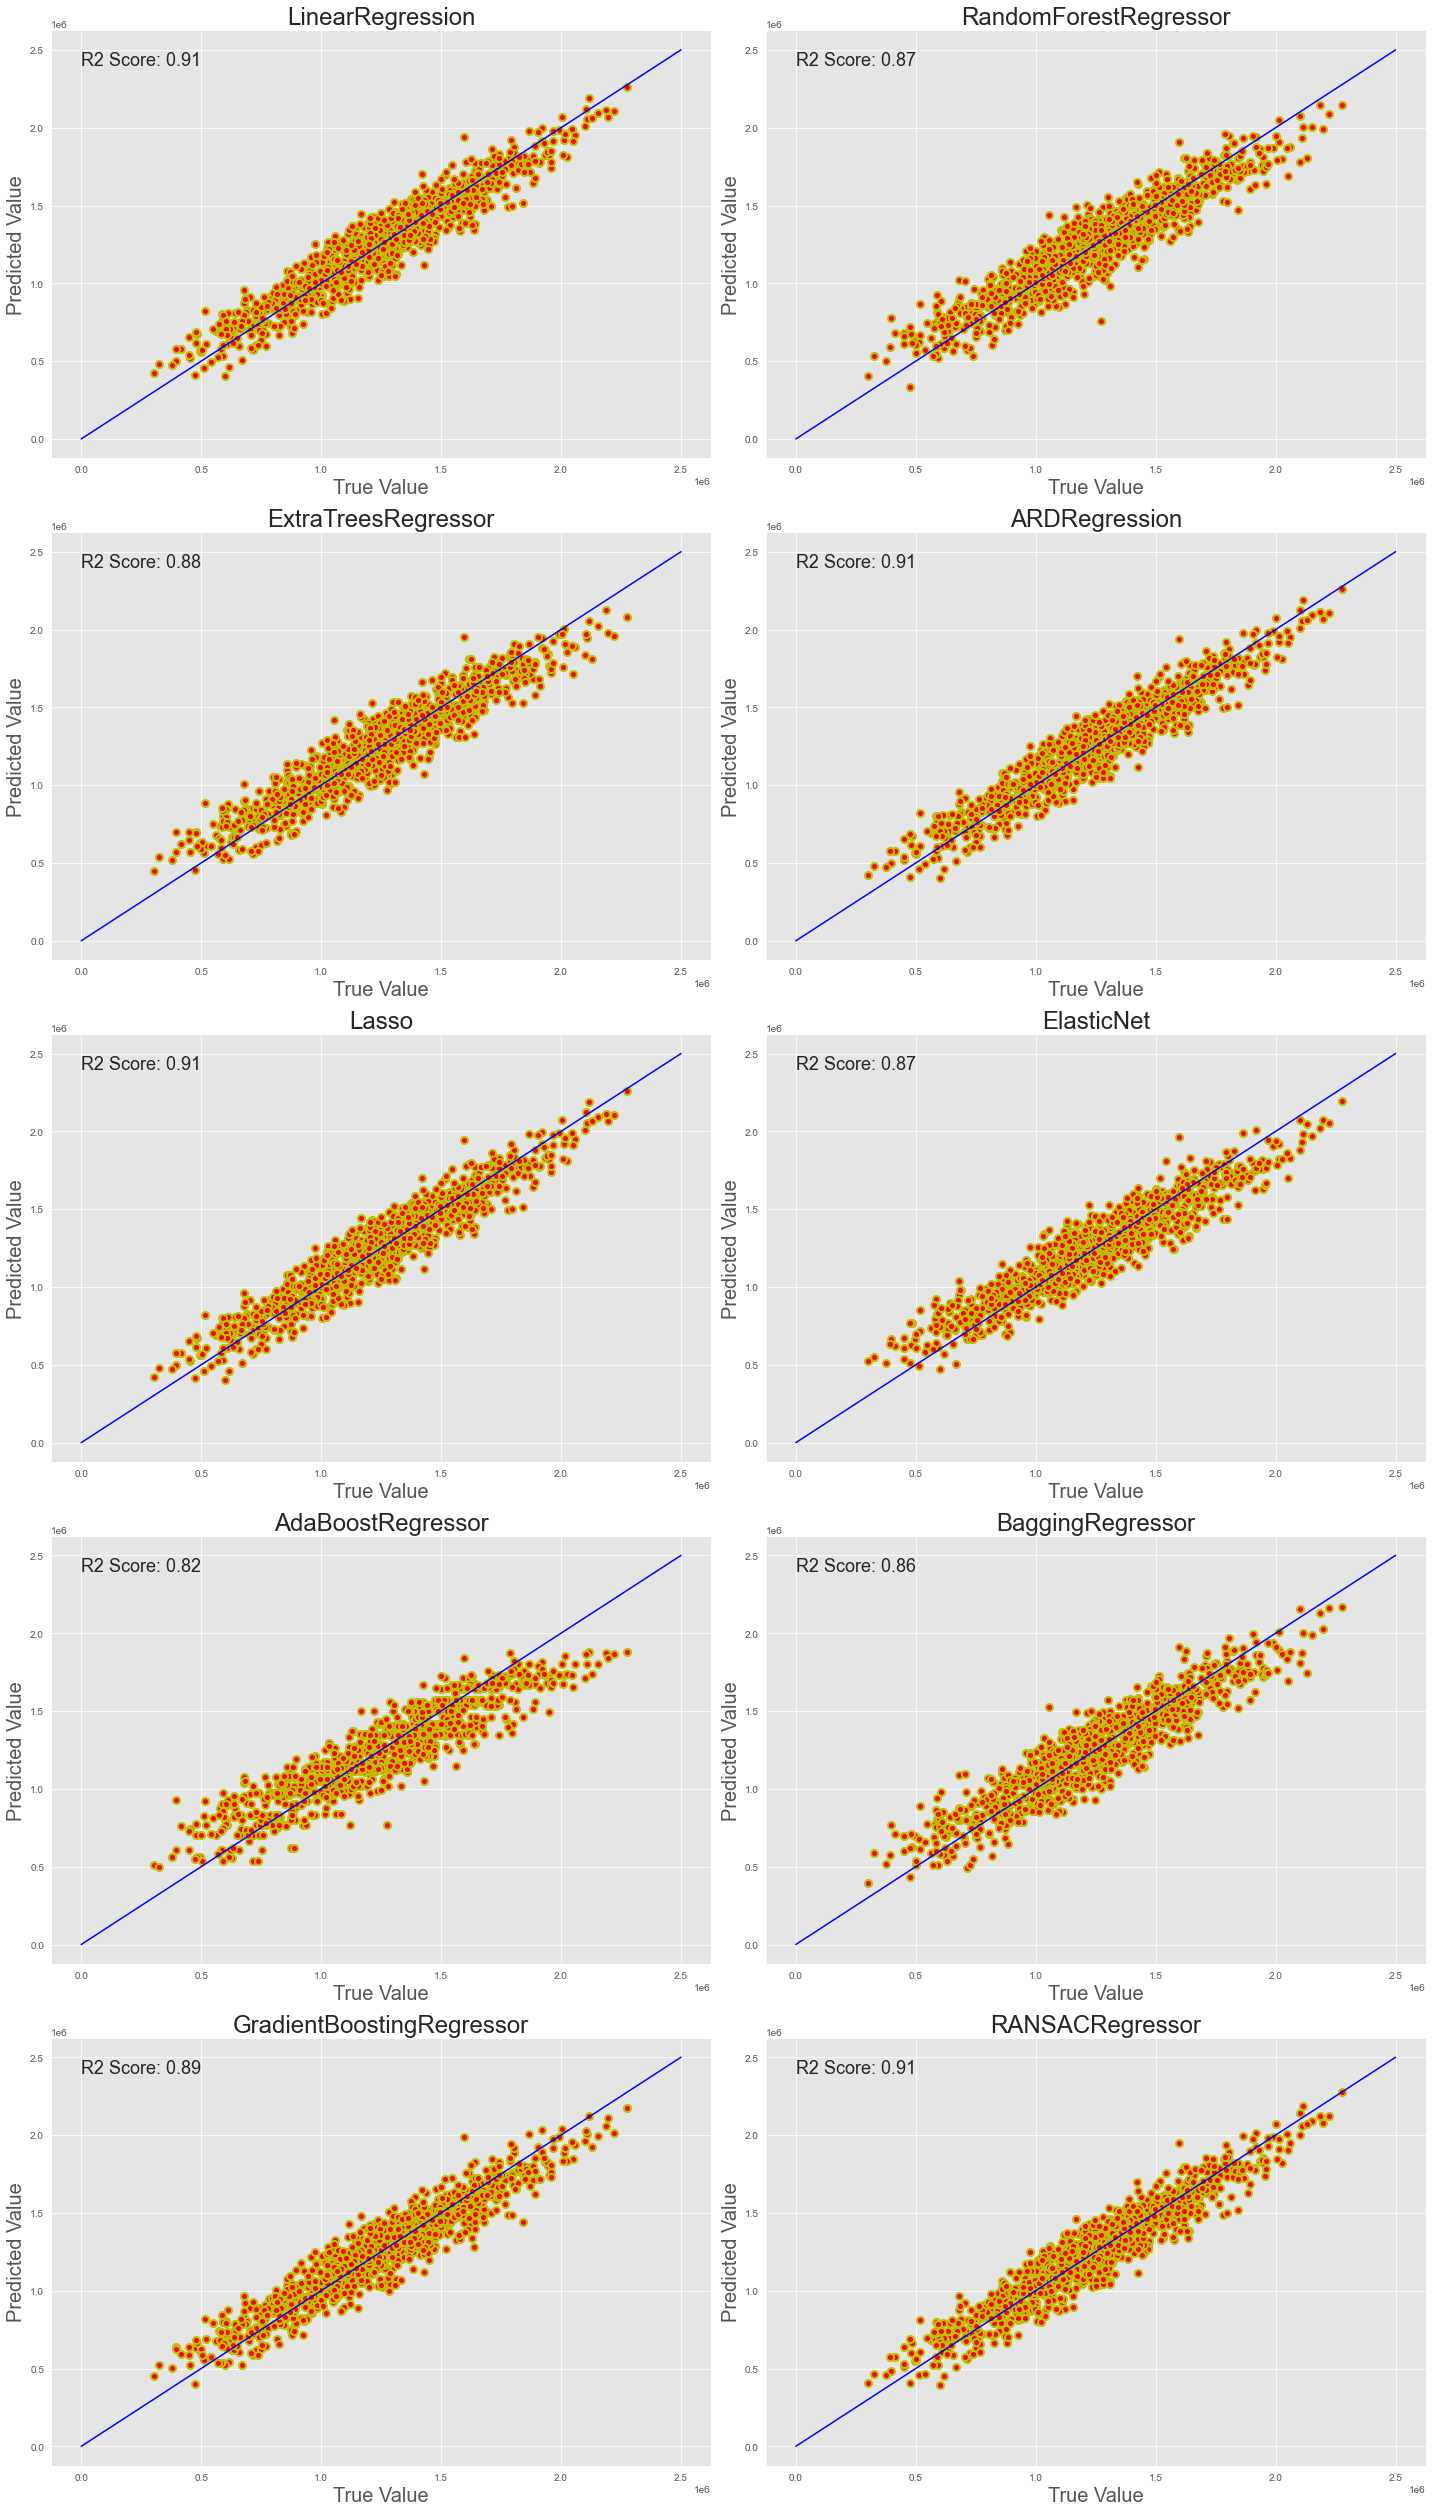

In [23]:
plt.figure(figsize=(20,35))
plt.style.use('ggplot')
for num,var in enumerate(y_pred.columns):
    plt.subplot(5,2,num+1)
    plt.scatter(x=y_test,y=y_pred[var],c='r',s=50,edgecolor='y',linewidth=2,)
    plt.plot([0,2.5e6],[0,2.5e6],color='blue')
    plt.xlabel("True Value",fontsize=20)
    plt.ylabel("Predicted Value",fontsize=20)
    plt.title(var,fontsize=24)
    plt.text(0,2.4e6,f'R2 Score: {round(R2_Scores[var],2)}',fontsize=18)
    plt.tight_layout()


#### DISPLAYING THE SCORES DATAFRAME

In [24]:
Scores

,R2,MAE,MSE,RMSE
LinearRegression,0.906742,86790.138420,1.156091e+10,107521.673654
RandomForestRegressor,0.873040,100018.637850,1.573875e+10,125454.191609
ExtraTreesRegressor,0.878006,98987.491530,1.512317e+10,122976.306089
ARDRegression,0.906732,86792.360831,1.156210e+10,107527.196244
Lasso,0.906742,86790.156027,1.156091e+10,107521.684316
ElasticNet,0.873231,100012.935610,1.571509e+10,125359.861355
AdaBoostRegressor,0.824635,116275.653480,2.173939e+10,147442.824364
BaggingRegressor,0.863309,103780.691300,1.694505e+10,130173.161916
GradientBoostingRegressor,0.892310,92779.513758,1.334989e+10,115541.732560
RANSACRegressor,0.906397,86698.690748,1.160365e+10,107720.220461


#### BARPLOT FOR DIFFERENT SCORES

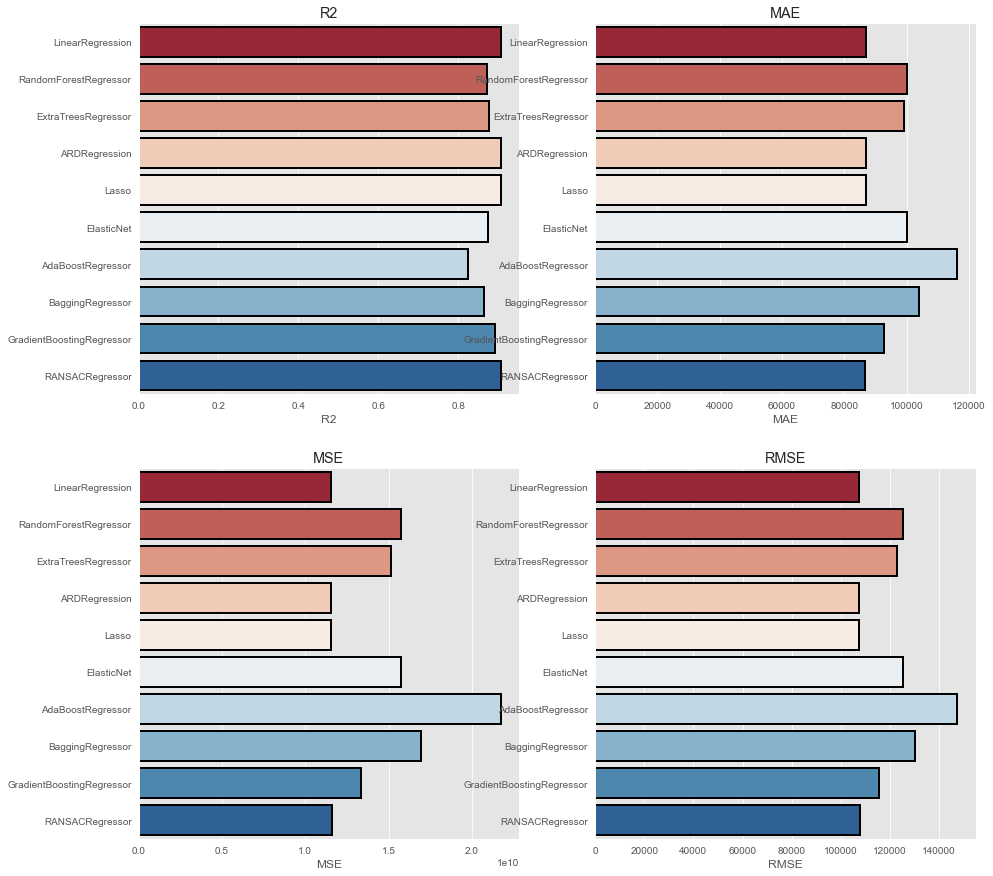

In [25]:
plt.figure(figsize=(15,15))
for num,var in enumerate(Scores.columns):
    plt.subplot(2,2,num+1)
    sb.barplot(y=Scores.index,x=Scores[var],palette='RdBu',edgecolor='k',linewidth=2,).set_title(var)
    
    
    

#### PLOTTING THE HISTOGRAM FOR DIFFERENCES IN PRICE

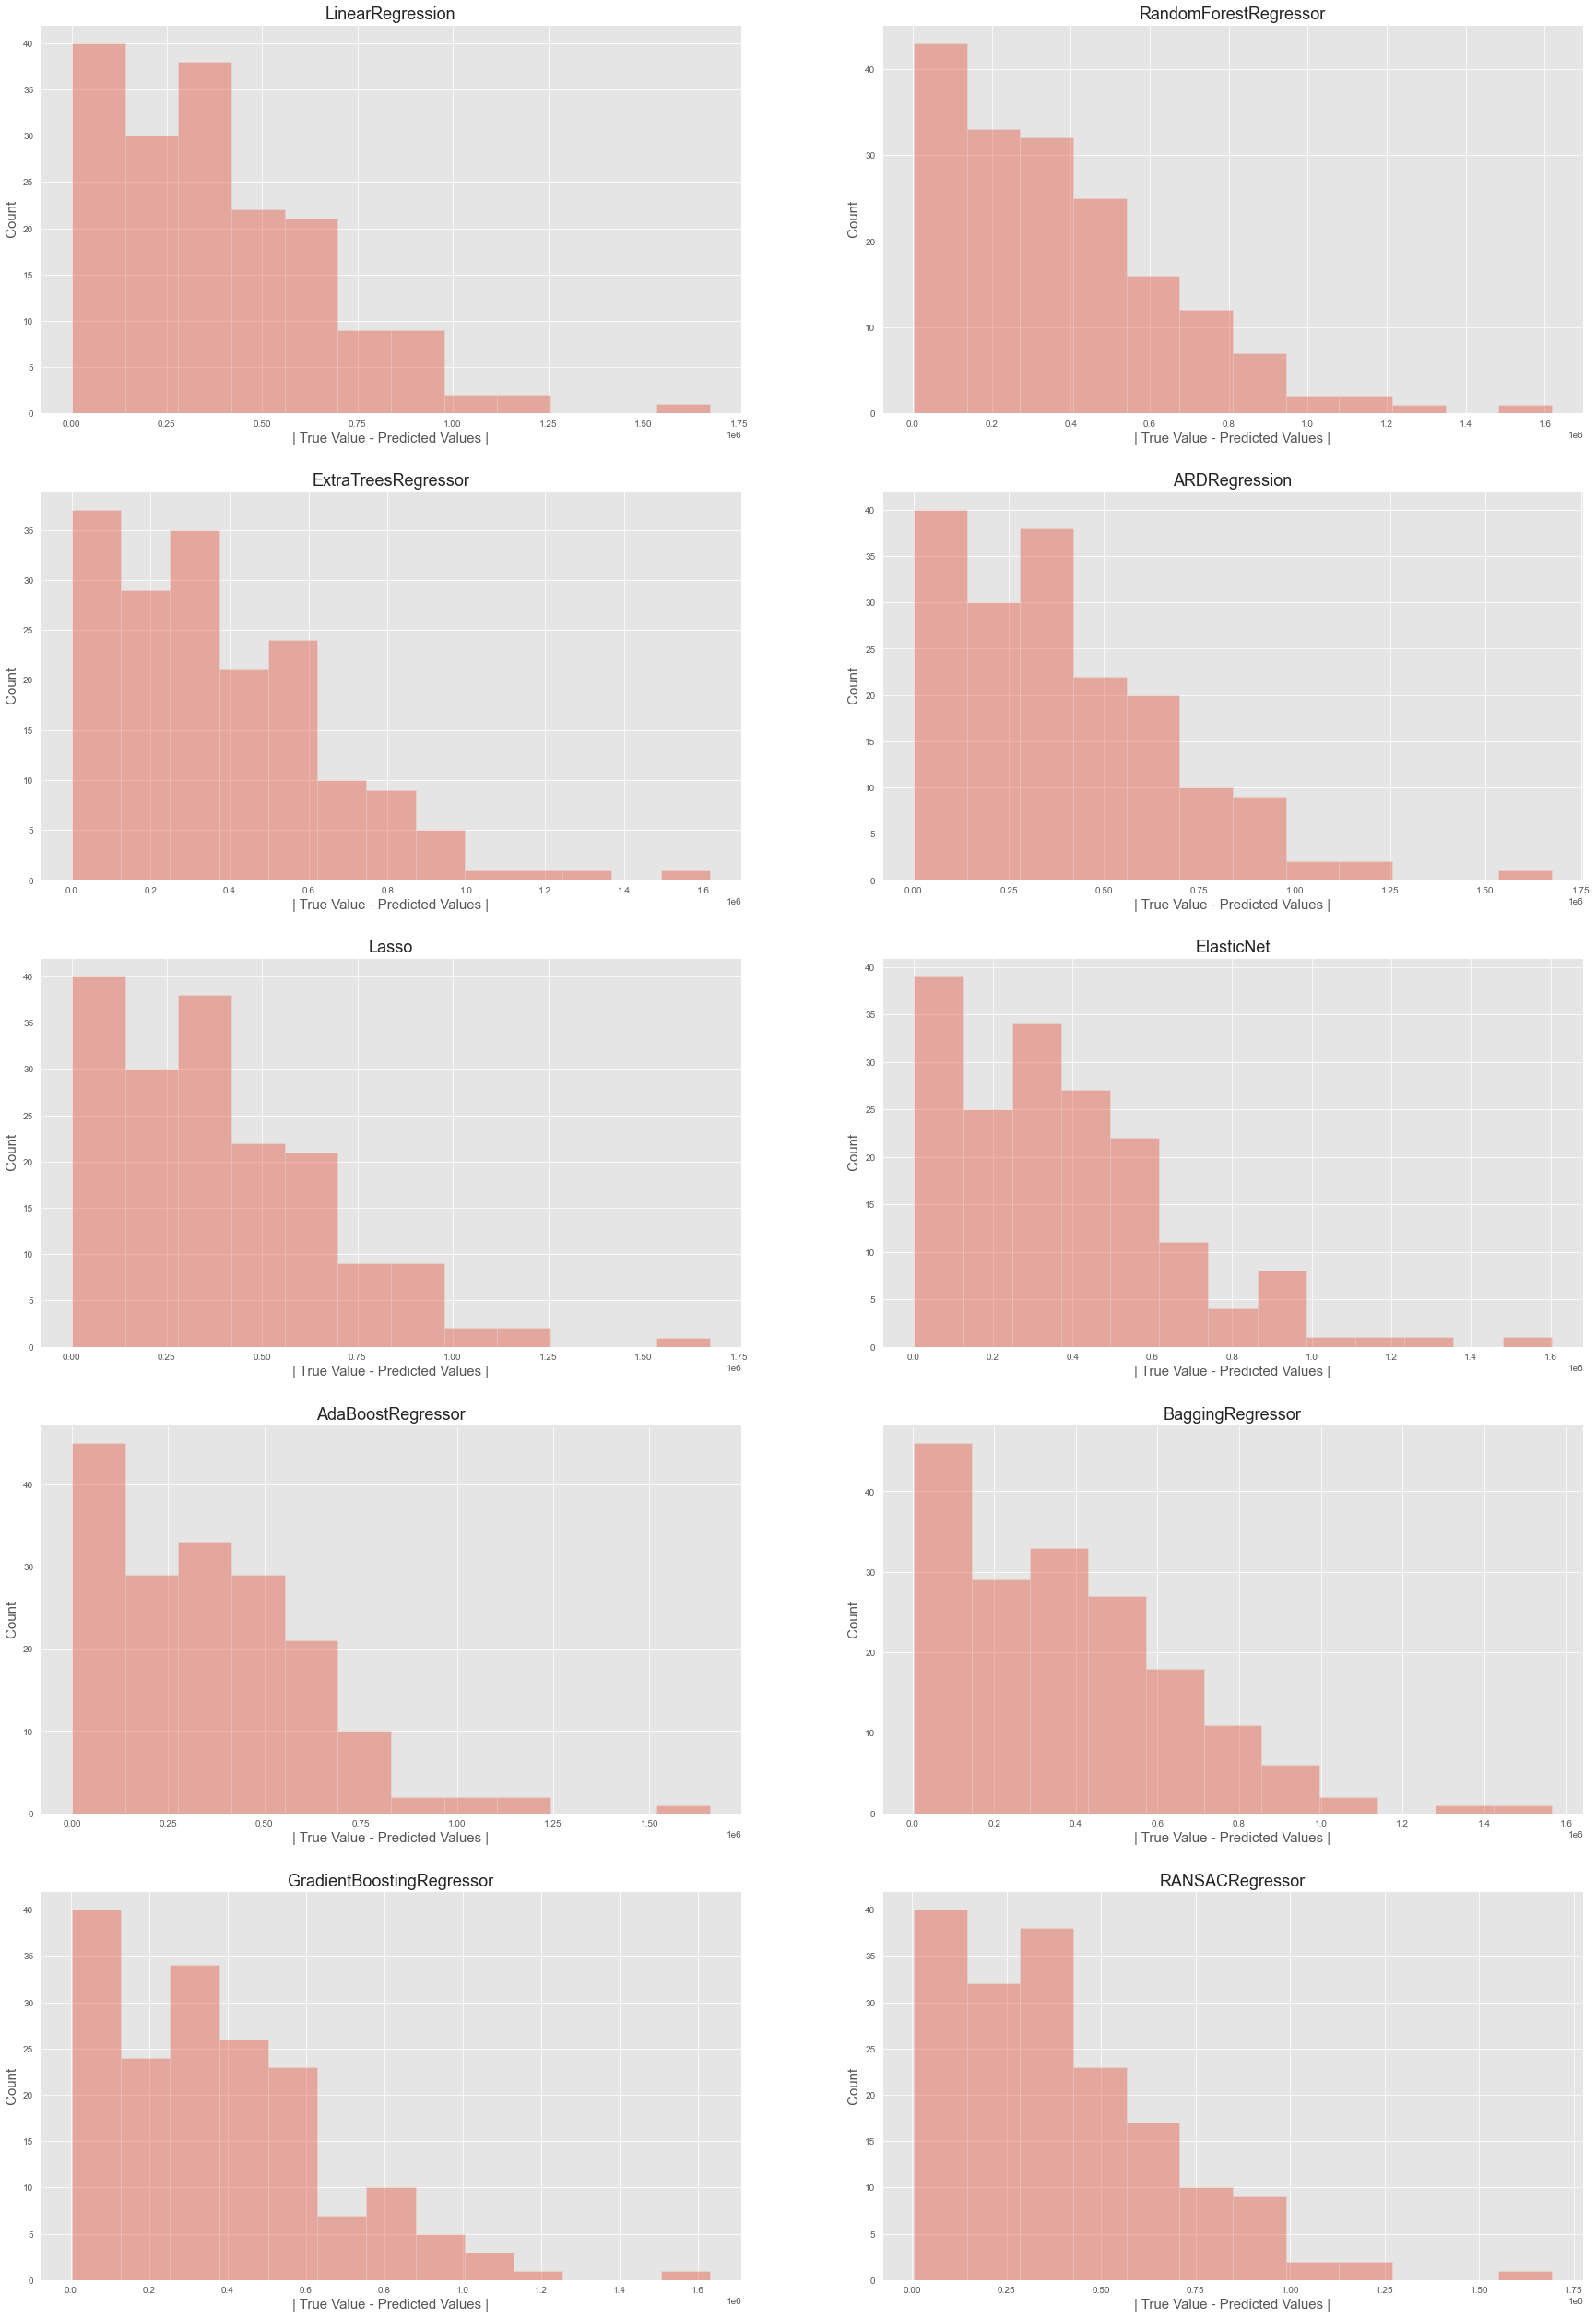

In [26]:
plt.figure(figsize=(30,45))
plt.style.use('ggplot')
for num,var in enumerate(y_pred.columns):
    plt.subplot(5,2,num+1)
    sb.distplot(abs(y_test-y_pred[var]),kde=False)
    plt.xlabel("| True Value - Predicted Values |",fontsize=15)
    plt.ylabel(" Count ",fontsize=15)
    plt.title(var,fontsize=18)